<a href="https://colab.research.google.com/github/aloksingh43/Topic_Modeling_on_News_Articles/blob/main/Topic_Modeling_on_BBC_News_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=DeprecationWarning)

In [2]:
#mouting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading the data
News=[]
Type=[]

path="/content/drive/MyDrive/bbc"
folders=["business","entertainment","politics","sport","tech"] 
for i in folders:
    files=os.listdir(path+'/'+i)
    for text_file in files:
        file_path=path + '/'+i+'/'+text_file
        with open(file_path,'rb') as f:
            data=f.read()
        News.append(data)
        Type.append(i)

In [4]:
#wrinting data to csv format
data={'news':News,'type':Type}
df_bbc = pd.DataFrame(data)

In [5]:
df_bbc['news'] = df_bbc['news'].apply(lambda x: x.decode('iso-8859-1'))

In [6]:
df=df_bbc.copy()

In [7]:
df.shape

(2225, 2)

In [8]:
df.columns

Index(['news', 'type'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2225 non-null   object
 1   type    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [10]:
df.head()

,news,type
0,Yukos unit buyer faces loan claim\n\nThe owner...,business
1,Ad sales boost Time Warner profit\n\nQuarterly...,business
2,Dollar gains on Greenspan speech\n\nThe dollar...,business
3,US trade gap hits record in 2004\n\nThe gap be...,business
4,High fuel prices hit BA's profits\n\nBritish A...,business


In [11]:
df.tail()

,news,type
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Bad e-mail habits sustains spam\n\nThe 'bad be...,tech
2222,Microsoft plans 'safer ID' system\n\nMicrosoft...,tech
2223,Camera phones are 'must-haves'\n\nFour times m...,tech
2224,Beckham virus spotted on the net\n\nVirus writ...,tech


In [12]:
df.iloc[0]['news']

'Yukos unit buyer faces loan claim\n\nThe owners of embattled Russian oil giant Yukos are to ask the buyer of its former production unit to pay back a $900m (Â£479m) loan.\n\nState-owned Rosneft bought the Yugansk unit for $9.3bn in a sale forced by Russia to part settle a $27.5bn tax claim against Yukos. Yukos\' owner Menatep Group says it will ask Rosneft to repay a loan that Yugansk had secured on its assets. Rosneft already faces a similar $540m repayment demand from foreign banks. Legal experts said Rosneft\'s purchase of Yugansk would include such obligations. "The pledged assets are with Rosneft, so it will have to pay real money to the creditors to avoid seizure of Yugansk assets," said Moscow-based US lawyer Jamie Firestone, who is not connected to the case. Menatep Group\'s managing director Tim Osborne told the Reuters news agency: "If they default, we will fight them where the rule of law exists under the international arbitration clauses of the credit."\n\nRosneft official

In [13]:
## Checking null values
print(df.isna().sum())  

news    0
type    0
dtype: int64


In [14]:
df.describe(include='all')

,news,type
count,2225,2225
unique,2127,5
top,Speak easy plan for media players\n\nMusic and...,sport
freq,2,511


In [15]:
print(len(df[df.duplicated()]))

98


In [16]:
df.drop_duplicates(keep='last', inplace=True)

In [17]:
# shape after drope duplicate values
df.shape

(2127, 2)

In [18]:
count_news_type = df['type'].value_counts()
count_news_type

sport            505
business         503
politics         403
entertainment    369
tech             347
Name: type, dtype: int64

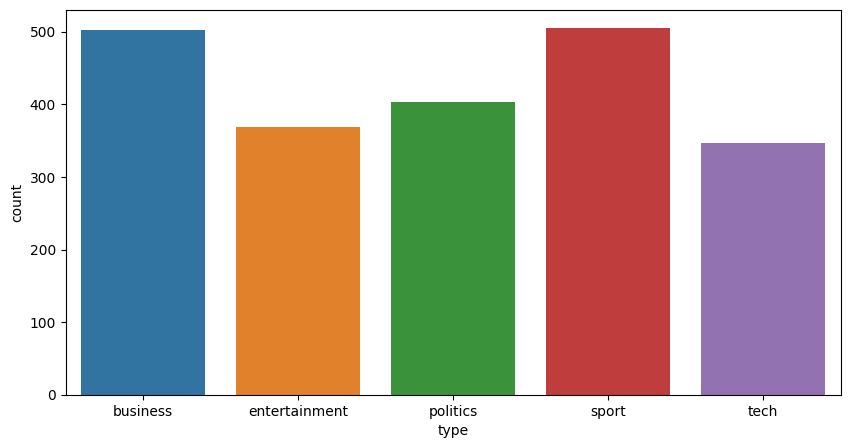

In [19]:
plt.figure(figsize = (10, 5))
sns.countplot(x="type", data=df)
plt.show()

In [20]:
# A function which returns the number of wordes in text
def length(text):
  split_words=text.split(" ")
  return len(split_words)

In [21]:
# apply length function in "news" column
df['initial_text_words']=df['news'].apply(length)

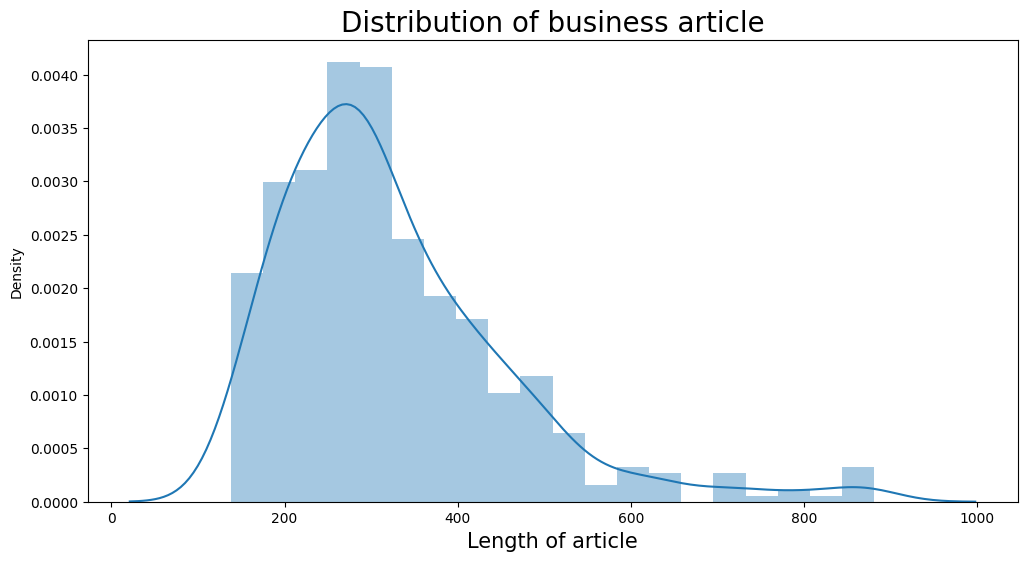

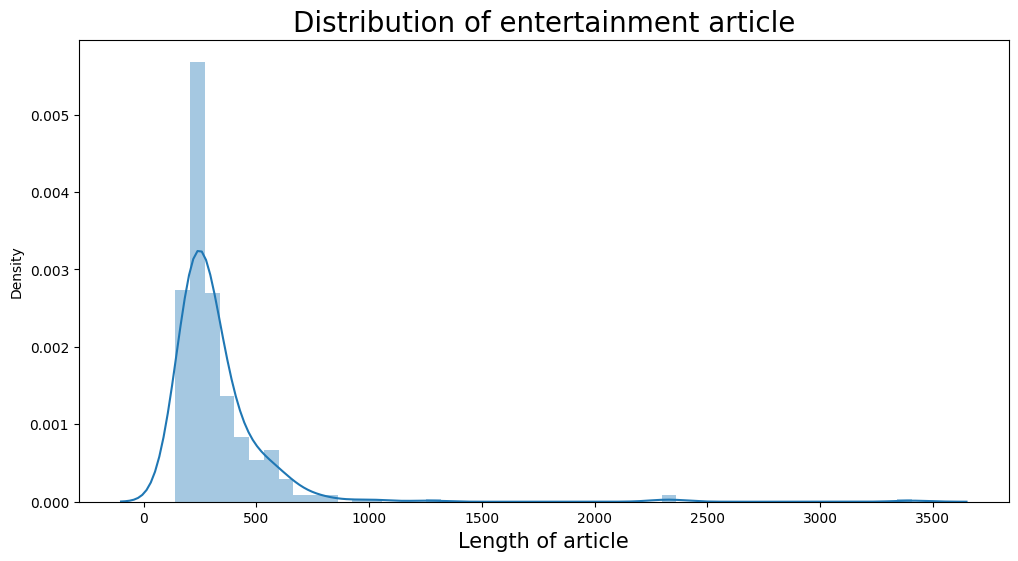

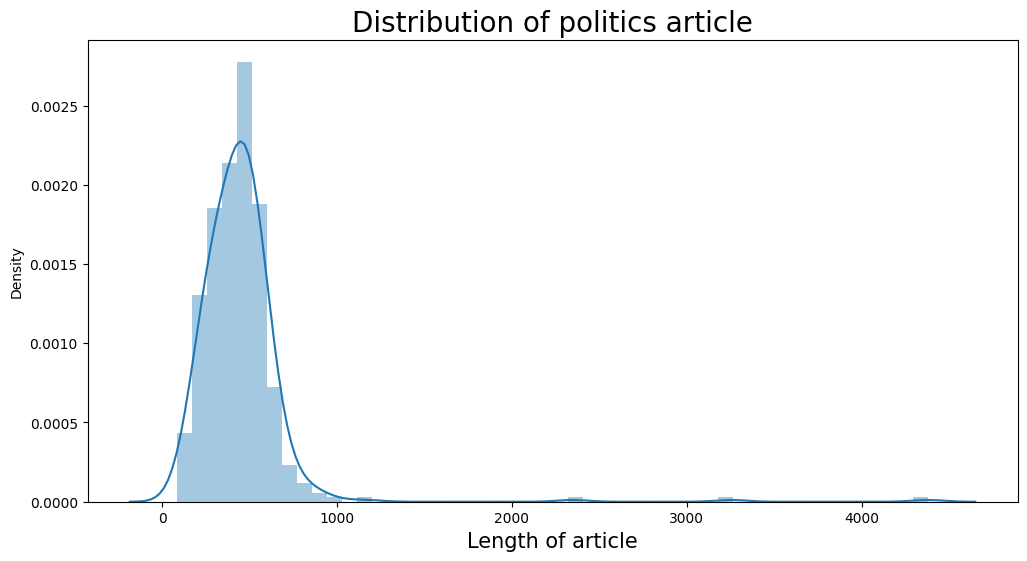

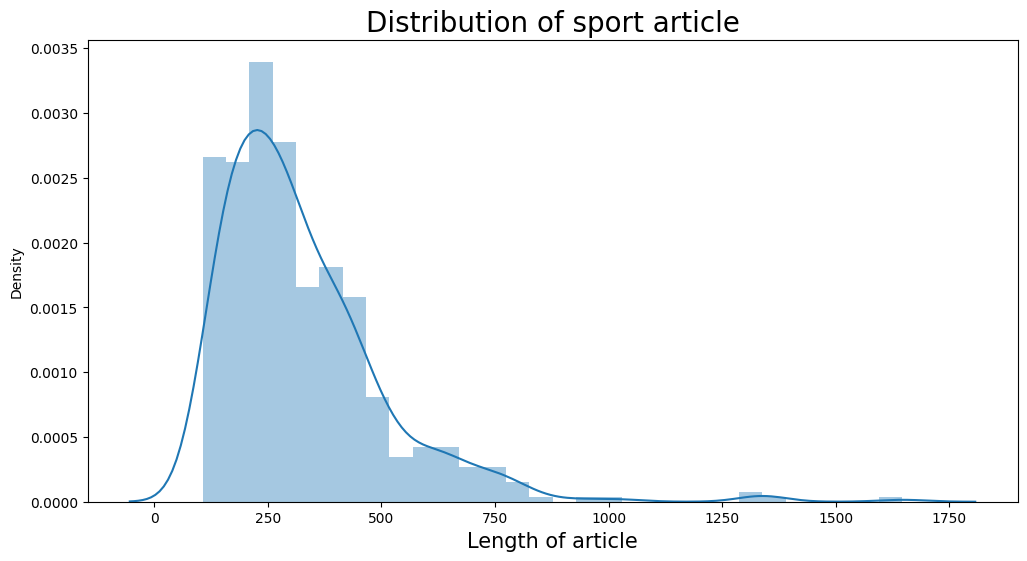

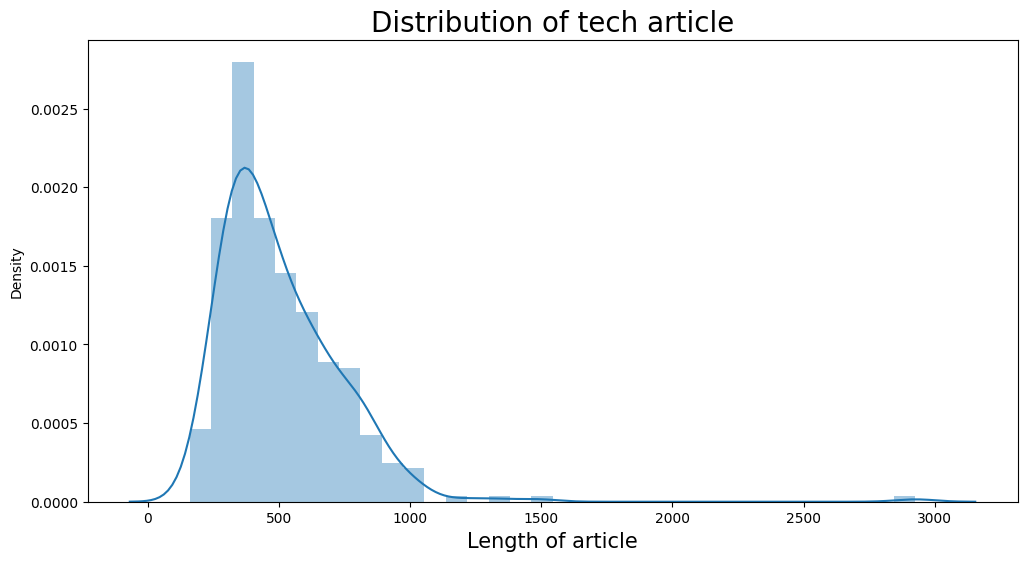

In [22]:
#Distribution of different types of articles
types_article=list(df['type'].unique())
for article in types_article:
  df_article=df[df['type']==article]
  plt.figure(figsize=(12,6))
  fig=sns.distplot(x=df_article['initial_text_words'])
  fig.set_title(f'Distribution of {article} article',size=20)
  fig.set_xlabel('Length of article',size=15);

In [23]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [24]:
df['news'] = df['news'].apply(remove_punctuation)
df.head(10)

,news,type,initial_text_words
0,Yukos unit buyer faces loan claim\n\nThe owner...,business,261
1,Ad sales boost Time Warner profit\n\nQuarterly...,business,416
2,Dollar gains on Greenspan speech\n\nThe dollar...,business,381
3,US trade gap hits record in 2004\n\nThe gap be...,business,324
4,High fuel prices hit BAs profits\n\nBritish Ai...,business,401
5,India widens access to telecoms\n\nIndia has r...,business,267
6,Yukos loses US bankruptcy battle\n\nA judge ha...,business,448
7,Ask Jeeves tips online ad revival\n\nAsk Jeeve...,business,182
8,Indonesians face fuel price rise\n\nIndonesias...,business,297
9,Telegraph newspapers axe 90 jobs\n\nThe Daily ...,business,458


In [25]:
import nltk
nltk.download('stopwords')
import spacy
import gensim

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
# collection of Stopwords
# list of stopwords from nltk
stopwords_nltk = list(nltk.corpus.stopwords.words('english'))

# list of stopwords from spacy
sp = spacy.load('en_core_web_sm')
stopwords_spacy = list(sp.Defaults.stop_words)

# list of stopwords from gensim
stopwords_gensim = list(gensim.parsing.preprocessing.STOPWORDS)

# unique stopwords from all stopwords
all_stopwords = []
all_stopwords.extend(stopwords_nltk)
all_stopwords.extend(stopwords_spacy)
all_stopwords.extend(stopwords_gensim)

# all unique stop words
all_stopwords = list(set(all_stopwords))

In [27]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in all_stopwords]
    # joining the list of words with space separator
    return " ".join(text)


In [28]:
df['news'] = df['news'].apply(stopwords)
df.head(10)

,news,type,initial_text_words
0,yukos unit buyer faces loan claim owners embat...,business,261
1,ad sales boost time warner profit quarterly pr...,business,416
2,dollar gains greenspan speech dollar hit highe...,business,381
3,trade gap hits record 2004 gap exports imports...,business,324
4,high fuel prices hit bas profits british airwa...,business,401
5,india widens access telecoms india raised limi...,business,267
6,yukos loses bankruptcy battle judge dismissed ...,business,448
7,ask jeeves tips online ad revival ask jeeves l...,business,182
8,indonesians face fuel price rise indonesias go...,business,297
9,telegraph newspapers axe 90 jobs daily sunday ...,business,458
